<img src="https://www.e4ds.com/news_photo/U77C53G6CP8ASEHUJ5B7.png">

## NVIDIA GPU 확인 

In [1]:
!nvidia-smi

Thu Jul 31 11:38:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.80                 Driver Version: 576.80         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  |   00000000:01:00.0  On |                  N/A |
| 31%   38C    P0             25W /  170W |    1419MiB /  12288MiB |     32%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## HuggingFace의 `pipeline`

HuggingFace의 `pipeline` task 중 `fill-mask`는 **Masked Language Modeling**을 수행하므로, 문장 안에 있는 [MASK] 토큰을 가장 자연스럽게 채울 수 있는 단어를 예측한다. 

In [1]:
from transformers import pipeline
# import torch 

unmasker = pipeline(
    'fill-mask',
    model = 'bert-base-uncased',
    device = 'cuda'
)

text = "Hello I'm a [MASK] model."

unmasker(text)

c:\Users\user\anaconda3\envs\torchenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda


[{'score': 0.10731087625026703,
  'token': 4827,
  'token_str': 'fashion',
  'sequence': "hello i ' m a fashion model."},
 {'score': 0.08774485439062119,
  'token': 2535,
  'token_str': 'role',
  'sequence': "hello i ' m a role model."},
 {'score': 0.053383853286504745,
  'token': 2047,
  'token_str': 'new',
  'sequence': "hello i ' m a new model."},
 {'score': 0.04667214676737785,
  'token': 3565,
  'token_str': 'super',
  'sequence': "hello i ' m a super model."},
 {'score': 0.027095848694443703,
  'token': 2986,
  'token_str': 'fine',
  'sequence': "hello i ' m a fine model."}]

In [ ]:
msg = "Hello World!"

print(f"Tokenize: {unmasker.tokenizer.tokenize(msg)}")

# 인코딩 
encoded = unmasker.tokenizer.encode(msg)
print(f"Encoding: {encoded}")

print(f"Encoding: {unmasker.tokenizer.decode(encoded)}")

unmasker.tokenizer('Hello world!', "Have a great day!")

Tokenize: ['hello', 'world', '!']
Encoding: [101, 7592, 2088, 999, 102]
Encoding: [CLS] hello world! [SEP]


{'input_ids': [101, 7592, 2088, 999, 102, 2031, 1037, 2307, 2154, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

- `input_ids`: 문장을 이루는 토큰의 ID로, 미리 정해진 어휘(vocabulary)안의 항목들이다.
- `token_type_ids`: 각 토큰이 첫 번째 문장에 속하는지, 두 번째 문장에 속하는지를 나타내는 플래그이다. 
- `attention_mask`: 각 토큰이 다른 토큰을 얼마나 참고(attend)할 수 있는지 조절하는 역할로, Transformers 모델에서 어떤 토큰에 주의를 기울여야 하는지를 지정하는 mask tensor 
    - 0: 해당 토큰을 무시(padding)
    - 1: 해당 토큰을 모델이 주목(Attention) 

In [8]:
unmasker.tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [7]:
unmasker.tokenizer.model_input_names

['input_ids', 'token_type_ids', 'attention_mask']

In [ ]:
model = unmasker.model
# print(model)

model.bert.embeddings # 임베딩 모델만 확인 

BertEmbeddings(
  (word_embeddings): Embedding(30522, 768, padding_idx=0)
  (position_embeddings): Embedding(512, 768)
  (token_type_embeddings): Embedding(2, 768)
  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [9]:
unmasker.tokenizer.vocab_size

30522

## Word Embeddings 

In [16]:
import torch 

tokenizer = unmasker.tokenizer

model = unmasker.model # 모델 load 

string = "Hello World From Me, my cat and my dog!"
tokens = [tokenizer.convert_ids_to_tokens(x) for x in tokenizer.encode(string)]
token_ids = torch.tensor(tokenizer(string)['input_ids']).to('cuda')
embeddings = model.bert.embeddings.word_embeddings(token_ids)

print(embeddings.shape)
print(embeddings)

torch.Size([13, 768])
tensor([[ 0.0136, -0.0265, -0.0235,  ...,  0.0087,  0.0071,  0.0151],
        [-0.0043, -0.0330, -0.0217,  ..., -0.0425, -0.0127, -0.0389],
        [ 0.0244,  0.0322,  0.0024,  ..., -0.0424, -0.0054, -0.0284],
        ...,
        [-0.0149,  0.0124,  0.0091,  ..., -0.0445, -0.0193,  0.0234],
        [ 0.0298, -0.0373, -0.0356,  ...,  0.0161,  0.0192,  0.0173],
        [-0.0145, -0.0100,  0.0060,  ..., -0.0250,  0.0046, -0.0015]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)


## Visualize similarityu between embeddings 

In [19]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def cosine_similarity(x1, x2):
    """Compute cosine similarity between two vectors."""
    # 우선적으로 x1과 x2를 정규화하였으므로, 따로 나눠줄 필요 없이 정규화된 x1과 x2의 내적을 return 
    x1_normalized = x1 / torch.norm(x1, dim=1, keepdim=True)
    x2_normalized = x2 / torch.norm(x2, dim=1, keepdim=True)
    return x1_normalized @ x2_normalized.T

def scaled_dp_similarity(x1, x2):
    """Compute dot-product similarity between two vectors."""
    dot_product = x1 @ x2.T
    d = torch.sqrt(torch.tensor(x1.shape[-1]))
    return dot_product / d

def softmax_similarity(x1, x2):
    """Compute softmaxed dp similarity between two vectors."""
    out = scaled_dp_similarity(x1, x2)
    return torch.softmax(out, dim=1) # dim = 1로 설정하여 각 행마다 softmax 연산을 통해 확률값 return 

def plot_mtx(matrix, name='', tokens=[]):
    """Compute similarity matrix for embeddings."""
    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    label_dict = {} if tokens is None else {'xticklabels' : tokens, 'yticklabels': tokens}
    sns.heatmap(
        # detach().numpy()로 gradient 누적 X, numpy로 이동시켜 matplotlib과 호환 
        np.round(matrix.detach().to('cpu').numpy(), 3),
        annot=True, cmap='coolwarm',
        # vmin=-1, vmax=1,
        **label_dict
    )
    plt.title(f"Embedding {name} Matrix")
    plt.yticks(rotation=0)
    plt.show()

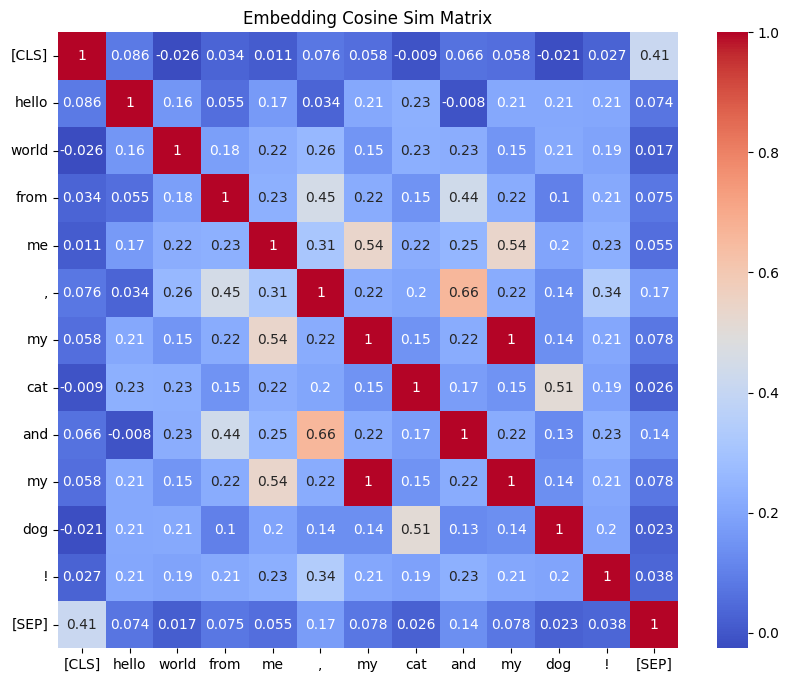

In [20]:
plot_mtx(cosine_similarity(embeddings, embeddings), 'Cosine Sim', tokens)

### Visualize Position Embeddings

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], device='cuda:0')


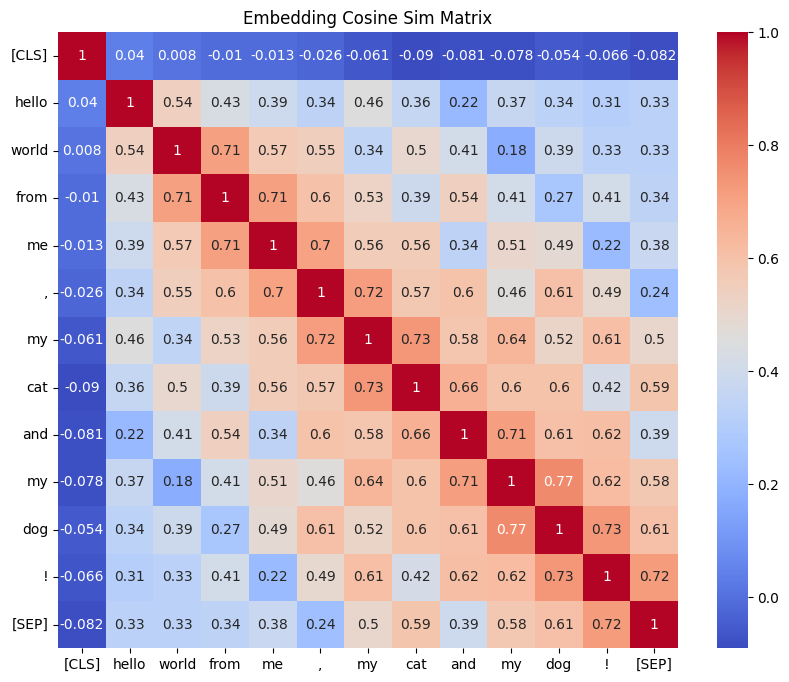

In [22]:
pos_options = torch.arange(len(tokens)).to('cuda') ## 0, 1, ..., n
print(pos_options)
pos_embeddings = model.bert.embeddings.position_embeddings(pos_options)
plot_mtx(cosine_similarity(pos_embeddings, pos_embeddings), 'Cosine Sim', tokens)

## HuggingFace의 `FiilMaskPipeline`

transformers의 `pipeline`과 대부분 유사하지만 좀 더 많은 제어권을 갖고 있으며 사용자가 더 유연하게 커스터마이징 할 수 있다.
- 내부적으로 `FillMaskPipeline` 객체를 생성한다. 

- FillMaskPipeline source code 
https://huggingface.co/docs/transformers/v4.53.3/en/main_classes/pipelines#transformers.FillMaskPipeline

In [3]:
from transformers import AutoTokenizer, AutoModelForMaskedLM
from transformers import FillMaskPipeline

model_ckpt = 'bert-base-uncased'

class MyMlmPipeline(FillMaskPipeline):
    def __init__(self, *args, **kwargs):
        super().__init__(
            tokenizer = AutoTokenizer.from_pretrained(model_ckpt),
            model = AutoModelForMaskedLM.from_pretrained(model_ckpt),
            *args, **kwargs
        )
    
    # __call__()을 오버라이드 -> 모델 객체를 함수처럼 호출하도록 
    # 현재 Fill?MaskPipeline을 상속중이므로, preprocess, forwawrd, 그리고 postprocess 등의 메서드는 
    # 따로 선언하지 않아도 정의되어 있음 
    def __call__(self, string, verbose = True):
        input_tensors = self.preprocess(string) # 전처리 메서드 
        if verbose:
            print("\npreprocess outputs: \n", input_tensors, '\n')
        output_tensors = self.forward(input_tensors) # 모델에 입력을 넣어서 logits값 계산 
        if verbose: print("forward outputs: \n", output_tensors, "\n")
        output = self.postprocess(output_tensors)
        return output 
    
    def preprocess(self, string):
        string = [string] if isinstance(string, str) else string 
        inputs = self.tokenizer(string, return_tensors = 'pt') # PyTorch tensor로 변환 
        inputs = {k: v.to('cuda') for k, v in inputs.items()} # 각 key의 value들을 cuda로 이동 
        
        return inputs 
    
    # preprocess를 pass한 tensor의 dictionary를 매개변수로 받음 
    def forward(self, tensor_dict: dict):
        output_tensors = self.model.forward(**tensor_dict)
        return {**output_tensors, **tensor_dict} 
    
    def postprocess(self, tensor_dict):
        tensor_dict = {k: v.to('cpu') for k, v in tensor_dict.items()}
        return super().postprocess(tensor_dict)
    
unmasker = MyMlmPipeline(device="cuda")
unmasker("Hello, Mr. Bert! How is it [MASK]?")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda



preprocess outputs: 
 {'input_ids': tensor([[  101,  7592,  1010,  2720,  1012, 14324,   999,  2129,  2003,  2009,
           103,  1029,   102]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')} 

forward outputs: 
 {'logits': tensor([[[ -6.6978,  -6.6436,  -6.6542,  ...,  -5.9664,  -5.8454,  -4.0651],
         [ -7.1922,  -7.0817,  -7.2808,  ...,  -6.6275,  -6.7937,  -5.0987],
         [-14.1895, -14.3331, -14.3951,  ..., -11.4550, -10.5485, -10.7081],
         ...,
         [ -7.8704,  -7.9647,  -7.8207,  ...,  -6.7212,  -7.0204,  -4.0526],
         [-10.7055, -10.2556, -10.7905,  ...,  -9.1913, -10.1996,  -0.9692],
         [-10.9574, -11.0610, -10.8301,  ...,  -9.3833,  -9.7457,  -8.4909]]],
       device='cuda:0', grad_fn=<ViewBackward0>), 'input_ids': tensor([[  101,  7592,  1010,  2720,  1012, 14324,   999,  2129,  2003,  2009,
          

[{'score': 0.2386590838432312,
  'token': 2183,
  'token_str': 'going',
  'sequence': 'hello, mr. bert! how is it going?'},
 {'score': 0.07178762555122375,
  'token': 2017,
  'token_str': 'you',
  'sequence': 'hello, mr. bert! how is it you?'},
 {'score': 0.05827941372990608,
  'token': 6230,
  'token_str': 'happening',
  'sequence': 'hello, mr. bert! how is it happening?'},
 {'score': 0.0563339926302433,
  'token': 2651,
  'token_str': 'today',
  'sequence': 'hello, mr. bert! how is it today?'},
 {'score': 0.05287003889679909,
  'token': 2085,
  'token_str': 'now',
  'sequence': 'hello, mr. bert! how is it now?'}]